# 01 - Limpieza y enriquecimiento de datos
## Trabajo MDS-2oTrim. ==> Inmigracion en Chile

**Profesora:** Donoso I.<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.
<p>Santiago, 06 de Noviembre 2018

<p><img src="./images/01_limp_data.png"></p>

---
## Pregunta:
### En cuales comunas se concentran los inmigrantes que llegaron a la Región Metropolitana? Quien son? Como són? Y los nuevos, donde viverán?
---

## 1. Importar el dataset

Para la generación del dataset del proyecto, vamos a usar datos de la base de datos del [Departamento de Extranjeria y Migracion de Chile](http://www.extranjeria.gob.cl/estadisticas-migratorias/). 

El Departamanto de Extranjeria y Migracion de Chile, aclara que si bien las bases se presentan de manera separada por tratarse de distintos tipos de permiso, ellas no constituyen universos distintos de inmigrantes. Un inmigrante en Chile para obtener una permanencia definitiva DEBE haber obtenido con anterioridad una visa, por lo que las bases de permanencias definitivas se conforman de personas que están contabilizadas en las visas. <br>
<br>Así, para una mejor lectura de los datos haremos una distinción en términos de migración transitoria y migración permanente. Se considerará que las visas corresponden a migración transitoria, pues los permisos duran entre uno y dos años. Las personas que sean titulares de una visa, para quedarse por un plazo mayor a dos años, deben solicitar un permiso de permanencia definitiva, de otra manera deben abandonar el país.<br>
- En este trabajo nos enfocaremos en la MIGRACIÓN DEFINITIVA, que están relacionadas a las Permisos de Residencia Definitiva y desean convivir en Chile para desarrollarse.
- Y se complementará esa información con la migración reciente, es decir, las visas otorgadas los dos últimos años (2017/2018).

**Información Registrada**<br>
Las planillas de permisos migratorios contienen los siguientes datos, los cuales son extraídos de los formularios establecidos para solicitar residencia, disponibles en la página web del Departamento de Extranjería y Migración:
- Sexo
- Fecha de nacimiento
- Actividad (*): refiere a la actividad que el extranjero declara realizar en nuestro país. 
- Profesión (*): refiere a la profesión que el extranjero declara al momento de realizar su solicitud.
- País
- Estudios (*): refiere al nivel de estudios que el migrante declara al momento de realizar su solicitud. 
- Comuna (*):corresponde a la comuna de residencia que declara el inmigrante al momento de realizar su solicitud y no da cuenta necesariamente de la actual residencia del extranjero
- Provincia (*): corresponde a la provincia de residencia que declara el inmigrante al momento de realizar su solicitud y no da cuenta necesariamente de la actual residencia del extranjero
- Región (*): corresponde a la región de residencia que declara el inmigrante al momento de realizar su solicitud y no da cuenta necesariamente de la actual residencia del extranjero
- Tit – Dep: se refiere a la categoría TITULAR del permiso migratorio otorgado o DEPENDIENTE en el caso que el permiso es otorgado a un familiar directo, y el dependiente lo acompaña en su residencia en Chile.
- Año: se refiere al año en que se otorga el permiso migratorio
- Beneficio: referido al permiso de residencia otorgado (tipo de visa según categoría legal: estudiante, sujeta a contrato, temporaria)

(*) Se trata de una variable con moderada tasa de registro, por lo que se sugiere utilizar con cautela la información que ella arroja. Ademas, por tratarse de información autodeclarada no se presentan medios de verificación

#### NOTA:
Hasta el presente momento, el INE no entrega datos detallados del Censo 2017 en lo que corresponde a los extranjeros (dados públicos són consolidados por manzanas y no por casas ("households"). por esto, se optó por trabajar con los datos del IME. Así, es importnate apuntar, que los numeros finales no són una fotografia de los inmigrantes en Chile, pero una muy buena representación y tendencias. Además, en un análisis adicional, se puede confirmar que el dataset generado, al menos en termino de cantidad de extrajeros por comunas, tiene un alto grade de correlación con los datos del Censo 2017, esta correlacion es un indicio bastante fuerte de que los resultados encontrados en el dataset final son bastante confiables. 

---

**Importación de las principales librerias y setup inicial para las gráficas**

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(12,6))

import warnings
warnings.filterwarnings("ignore")

In [2]:
ls ./data

01_extranjeros_rm.xlsx                 PDs_2018_1.xlsx
CENSO_2017_COMUNAS_RM.xlsx             Visas-2017.xlsx
Comunas_RM_Mapas_Vectoriales/          Visas-2018_1.xlsx
ML_extranjeros_rm.xlsx                 censo_2017_RM.xlsx
PDs-2005-2016.xlsx                     censo_2017_inmigrantes_rm_comuna.xlsx
PDs-2017.xlsx


`Los datos se distribuir en 5 datasets, los cuales deben ser leídos y concatenados en un único conjunto de datos.` 

In [3]:
df1 = pd.read_excel('./data/PDs-2005-2016.xlsx')
df1.shape

(324932, 12)

In [4]:
df1.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA


In [5]:
df2 = pd.read_excel('./data/PDs-2017.xlsx')
df2.shape

(87757, 12)

In [6]:
df2.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,femenino,1992-06-23,EMPLEADO,LICENCIADO,ECUADOR,UNIVERSITARIO,HUECHURABA,SANTIAGO,METROPOLITANA,T,2017,PERMANENCIA DEFINITIVA
1,masculino,1965-01-01,EMPRESARIO O PATRON,EMPRESARIO O PATRON,CHINA REPUBLICA POPULAR,UNIVERSITARIO,SAN FERNANDO,COLCHAGUA,O'HIGGINS,T,2017,PERMANENCIA DEFINITIVA


In [7]:
df3 = pd.read_excel('./data/PDs_2018_1.xlsx')
df3.shape

(48208, 12)

In [8]:
df3.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,masculino,1985-08-01,EMPLEADO,MENSAJERO,PERÚ,NO INFORMA,RECOLETA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,T,2018,OTORGA PERMANENCIA DEFINITIVA
1,masculino,2001-11-01,ESTUDIANTE,ESTUDIANTE,COLOMBIA,BASICO,INDEPENDENCIA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,D,2018,OTORGA PERMANENCIA DEFINITIVA


In [9]:
df4 = pd.read_excel('./data/Visas-2017.xlsx')
df4.shape

(267596, 12)

In [10]:
df4.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO RESUMIDO
0,masculino,1962-01-24,OTRAS ACTIVIDADES,GEOFISICO,ESTADOS UNIDOS,UNIVERSITARIO,SANTIAGO,SANTIAGO,METROPOLITANA,T,2017,TEMPORARIA
1,masculino,1973-01-04,EMPLEADO,INGENIERO,BOLIVIA,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2017,TEMPORARIA


In [11]:
df5 = pd.read_excel('./data/Visas-2018_1.xlsx', sheet_name=1)
df5.shape

(188638, 12)

In [12]:
df5.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO RESUMIDO
0,masculino,1993-02-10,INACTIVO,EMPLEADO,ARGENTINA,UNIVERSITARIO,PUCON,CAUTÍN,REGION DE LA ARAUCANIA,T,2018,TEMPORARIA
1,femenino,1976-01-20,DUEÑA DE CASA,DUEÑA DE CASA,ARGENTINA,no indica,VALDIVIA,VALDIVIA,REGION DE LOS RIOS,T,2018,TEMPORARIA


`Se observa que todos los datasets tienen las mismas columnas, excepto por los nombres de las columnas "FECH-NAC" y 'BENEFICIO RESUMIDO', las cuales tienen que ser cambiadas.`

In [13]:
df3.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df4.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df5.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df4.rename(columns = {'BENEFICIO RESUMIDO': 'BENEFICIO'}, inplace=True)
df5.rename(columns = {'BENEFICIO RESUMIDO': 'BENEFICIO'}, inplace=True)

`Con los 5 datasets normalizados, hay entonces que concatenarlos en un unico dataset`

In [14]:
df = pd.concat([df1, df2])
df.shape

(412689, 12)

In [15]:
df = pd.concat([df, df3])
df.shape

(460897, 12)

In [16]:
df = pd.concat([df, df4])
df.shape

(728493, 12)

In [17]:
df = pd.concat([df, df5])
df.shape

(917131, 12)

`Con los datos ya concatenados, se procede a realizar un rápido overview del dataset`

## 2. Limpiar el dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917131 entries, 0 to 188637
Data columns (total 12 columns):
SEXO          917131 non-null object
NACIMIENTO    917130 non-null datetime64[ns]
ACTIVIDAD     917131 non-null object
PROFESION     917131 non-null object
PAIS          917131 non-null object
ESTUDIOS      917131 non-null object
COMUNA        917131 non-null object
PROVINCIA     917131 non-null object
REGION        917131 non-null object
TIT_DEP       915476 non-null object
AÑO           917131 non-null int64
BENEFICIO     917131 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 91.0+ MB


`El dataset posee 917.131 registros, los cuales constituyen un conjunto aproximado de los extranjeros que viven en todo el Chile y 12 caracterísiticas distintas de los mismos (pero ni todas las observaciones están completas). El próximo paso es proceeder a la limpieza del dataset`

**a) Cambiar nombre de la columna AÑO a ANIO, para evitar caracteres especiles**

In [19]:
df.rename(columns = {'AÑO': 'ANIO'}, inplace=True)

In [20]:
df.head() 

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA


In [21]:
df.tail()

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
188633,masculino,1952-01-20,EMPRESARIO O PATRON,EMPRESARIO O PATRON,ARGENTINA,MEDIO,SAN ESTEBAN,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188634,masculino,1974-10-10,EMPLEADO,CHOFER,ARGENTINA,BASICO,LOS ANDES,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188635,masculino,1985-05-03,EMPLEADO,EMPLEADO,BRASIL,MEDIO,LOS ANDES,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188636,masculino,2006-05-01,ESTUDIANTE,ESTUDIANTE,ARGENTINA,BASICO,CALLE LARGA,LOS ANDES,REGION DE VALPARAISO,D,2018,TEMPORARIA
188637,masculino,2009-06-17,ESTUDIANTE,ESTUDIANTE,ARGENTINA,BASICO,CALLE LARGA,LOS ANDES,REGION DE VALPARAISO,D,2018,TEMPORARIA


`TIT_DEP tiene menos datos que los demas`

In [22]:
df.TIT_DEP.value_counts()

T    809661
D    105815
Name: TIT_DEP, dtype: int64

In [23]:
df.TIT_DEP.describe()

count     915476
unique         2
top            T
freq      809661
Name: TIT_DEP, dtype: object

In [24]:
df.TIT_DEP.isnull().sum()

1655

`Hay 1655 lineas que no especifican si es titular o dependente. Lo consideraremos dependentes (D)`

In [25]:
df[df.TIT_DEP.isnull()].sample(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
23745,Masculino,1975-02-05,EMPLEADO,COCINERO,CHINA REPUBLICA POPULAR,no indica,VIÑA DEL MAR,VALPARAISO,VALPARAISO,NaN,2005,PERMANENCIA DEFINITIVA
24229,Femenino,1975-10-07,DUEÑA DE CASA,DUEÑA DE CASA,PARAGUAY,no indica,VALPARAISO,VALPARAISO,VALPARAISO,NaN,2005,PERMANENCIA DEFINITIVA
20773,Femenino,1953-02-16,EMPLEADO DOMESTICO,ASESORA DEL HOGAR,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,NaN,2005,PERMANENCIA DEFINITIVA
10880,Femenino,1973-08-09,DUEÑA DE CASA,DUEÑA DE CASA,PERÚ,no indica,CALAMA,EL LOA,ANTOFAGASTA,NaN,2006,PERMANENCIA DEFINITIVA
58693,femenino,1984-02-29,NO INFORMA,NO INFORMA,REPÚBLICA DOMINICANA,MEDIO,RECOLETA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,NaN,2018,TEMPORARIA


In [26]:
df.TIT_DEP.fillna('D', inplace=True)

In [27]:
len(df.TIT_DEP)

917131

`También se observa que NACIMIENTO posee un registro sin dato`

In [28]:
df.NACIMIENTO.isnull().sum()

1

In [29]:
df[df.NACIMIENTO.isnull()]

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
155441,Femenino,NaT,EMPLEADO,EMPLEADO,COLOMBIA,NO INFORMA,MACUL,SANTIAGO,METROPOLITANA,T,2010,PERMANENCIA DEFINITIVA


`Hay una titular del sexo feminino que no posee fecha de nacimiento`

In [30]:
df[df.TIT_DEP == 'T'].NACIMIENTO.dt.year.describe()

count    809660.000000
mean       1982.863655
std          11.941489
min        1900.000000
25%        1976.000000
50%        1985.000000
75%        1991.000000
max        2018.000000
Name: NACIMIENTO, dtype: float64

`La mediana del año de nacimiento es 1985. Vamos a usar una fecha de nacimiento de este año para rellenar la edad de esta persona.`

In [31]:
df.NACIMIENTO.fillna('1985-01-01', inplace=True)

In [32]:
df['NACIMIENTO'] = pd.to_datetime(df['NACIMIENTO'])

In [33]:
df.SEXO.value_counts()

masculino    324068
femenino     268131
Femenino     173110
Masculino    151822
Name: SEXO, dtype: int64

`Por los valores arriba, se observa que hay informaciones en mayusculas y minusculas ('feminino' y 'Feminino'. Cambiemos todas las observaciones del dataset con strings a minusculas para asi aprovechar y diferenciar de que no existan también caracteres especiales`

In [34]:
def replaceCaracteres(text):
    text = text.replace('á', 'a')
    text = text.replace('é', 'e')
    text = text.replace('í', 'i')
    text = text.replace('ó', 'o')
    text = text.replace('ú', 'u')
    text = text.replace('ñ', 'n')
    text = text.replace('ã', 'a')
    return text

In [35]:
def limpaTexto(text):
    text = text.lower()
    text = replaceCaracteres(text)
    return text 

`Testemos la función para la columna SEXO`

In [36]:
df['SEXO'] = df.SEXO.apply(limpaTexto)

In [37]:
df.SEXO.value_counts()

masculino    475890
femenino     441241
Name: SEXO, dtype: int64

`Ahora apliquemos la función a todas las columnas con strings`

In [38]:
df['ACTIVIDAD'] = df.ACTIVIDAD.apply(limpaTexto)
df['PROFESION'] = df.PROFESION.apply(limpaTexto)
df['PAIS'] = df.PAIS.apply(limpaTexto)
df['ESTUDIOS'] = df.ESTUDIOS.apply(limpaTexto)
df['COMUNA'] = df.COMUNA.apply(limpaTexto)
df['PROVINCIA'] = df.PROVINCIA.apply(limpaTexto)
df['REGION'] = df.REGION.apply(limpaTexto)
df['TIT_DEP'] = df.TIT_DEP.apply(limpaTexto)
df['BENEFICIO'] = df.BENEFICIO.apply(limpaTexto)

In [39]:
df.ACTIVIDAD.value_counts()

empleado                        518371
estudiante                      114792
empleado domestico               73514
duena de casa                    52698
obrero o jornalero               42566
inactivo                         34856
no informa                       21721
otras actividades                20866
trabajador por cuenta propia     15047
empresario o patron              10082
religioso                         7412
jubilado o pensionado             3846
rentista                           549
tripulante                         539
sin actividad                      272
Name: ACTIVIDAD, dtype: int64

`Hay muchas actividades que pueden ser normalizadas en menos grupos`

In [40]:
df.ACTIVIDAD.replace('empleado domestico', 'domestico', inplace=True)
df.ACTIVIDAD.replace('obrero o jornalero', 'obrero', inplace=True)
df.ACTIVIDAD.replace('trabajador por cuenta propia', 'autonomo', inplace=True)
df.ACTIVIDAD.replace('empresario o patron', 'empresario', inplace=True)
df.ACTIVIDAD.replace('autonomo', 'empresario', inplace=True)
df.ACTIVIDAD.replace('jubilado o pensionado', 'jubilado', inplace=True)
df.ACTIVIDAD.replace('otras actividades', 'otras', inplace=True)
df.ACTIVIDAD.replace('sin actividad', 'inactivo', inplace=True)
df.ACTIVIDAD.replace('rentista', 'otras', inplace=True)
df.ACTIVIDAD.replace('tripulante', 'otras', inplace=True)
df.ACTIVIDAD.replace('duena de casa', 'inactivo', inplace=True)
df.ACTIVIDAD.replace('no informa', 'no_informa', inplace=True)
df.ACTIVIDAD.replace('otras', 'no_informa', inplace=True)

In [41]:
df.ACTIVIDAD.value_counts()

empleado      518371
estudiante    114792
inactivo       87826
domestico      73514
no_informa     43675
obrero         42566
empresario     25129
religioso       7412
jubilado        3846
Name: ACTIVIDAD, dtype: int64

In [42]:
len(df.PROFESION.unique())

666

`Como profesion, se observa que hay un numero muy grande de diferentes valores (666), por lo que denota que no existe critério para la captura de este dato. Abajo miramos los primeros 25 tipos de profesión.` 

In [43]:
df.PROFESION.value_counts()[0:25]

empleado             139421
estudiante            95464
asesora del hogar     70933
menor de edad         47331
duena de casa         46299
ayudante              27136
vendedor              26851
ingeniero             25164
obrero                23442
jornalero             22146
aseador               14705
no informa            13780
tecnico               13252
operario              12732
auxiliar              12731
garzon                12728
licenciado            11226
comerciante           10486
cocinero               9327
medico                 8178
profesor               7851
contador               7284
asistente              7252
agricultor             6793
otras actividades      6715
Name: PROFESION, dtype: int64

In [44]:
df.REGION.value_counts()

metropolitana                                       443285
region metropolitana de santiago                    145821
antofagasta                                          72556
tarapaca                                             38281
valparaiso                                           30057
region de valparaiso                                 18015
region de antofagasta                                14714
o'higgins                                            12283
coquimbo                                             12269
atacama                                              12265
biobio                                               12160
maule                                                11308
region del maule                                     10721
arica y parinacota                                   10532
region del libertador general bernardo o'higgins      9373
region del biobio                                     7947
region de tarapaca                                    70

`Los nombres de las regiones están mezclados, por lo que se necesita normalizarlos`

In [45]:
def limpaRegiones(text):
    text = text.split(' ')
    if 'aisen' in text: text = 'aysen'
    elif 'aysen' in text: text= 'aysen'
    elif 'tarapaca' in text: text= 'tarapaca'
    elif 'bio-bio' in text: text= 'biobio'
    elif 'biobio' in text: text= 'biobio'
    elif 'metropolitana' in text: text= 'metropolitana'
    elif 'valparaiso' in text: text= 'valparaiso'
    elif 'lagos' in text: text= 'los-lagos'
    elif "o'higgins" in text: text= "o-higgins"
    elif 'araucania' in text: text= 'araucania'
    elif 'maule' in text: text= 'maule'
    elif 'coquimbo' in text: text= 'coquimbo'
    elif 'magallanes' in text: text= 'magallanes'
    elif 'antofagasta' in text: text= 'antofagasta'
    elif 'atacama' in text: text= 'atacama'
    elif 'rios' in text: text= 'los-rios'
    elif 'arica' in text: text= 'arica'
    else: text = 'Sin identificacion'
    return text 

In [46]:
df['REGION'] = df.REGION.apply(limpaRegiones)

In [47]:
df.REGION.value_counts()

metropolitana    589106
antofagasta       87270
valparaiso        48072
tarapaca          45295
maule             22029
o-higgins         21656
biobio            20107
arica             20026
coquimbo          17188
atacama           16433
los-lagos         10649
araucania          8414
magallanes         5797
los-rios           2998
aysen              2091
Name: REGION, dtype: int64

In [48]:
len(df.PAIS.unique())

183

`Como PAIS, se observa que hay un numero muy grande de diferentes valores (183). Abajo miramos los primeros 25 países de donde provienen los extranjeros a Chile.` 

In [49]:
df.PAIS.value_counts()[0:25]

peru                       213936
venezuela                  166718
haiti                      129914
colombia                   127008
bolivia                     98400
argentina                   32456
ecuador                     29571
china republica popular     14825
espana                      13861
brasil                      12193
cuba                        10592
republica dominicana         9126
estados unidos               8149
mexico                       5174
uruguay                      5050
paraguay                     4880
francia                      4472
alemania                     2995
italia                       2648
republica de corea           1866
india                        1607
japon                        1372
canada                       1208
federacion de rusia          1048
gran bretana                 1023
Name: PAIS, dtype: int64

In [50]:
df.ESTUDIOS.value_counts()

medio            285606
no indica        230654
universitario    118509
no informa       112428
basico            94959
tecnico           50666
ninguno           14570
prebasico          9739
Name: ESTUDIOS, dtype: int64

`De igual forma que arriba, hay que normalizar ESTUDIOS`

In [51]:
df.ESTUDIOS.replace('no indica', 'no informa', inplace=True)

In [52]:
df.ESTUDIOS.replace('prebasico', 'basico', inplace=True)

In [53]:
df.ESTUDIOS.value_counts()

no informa       343082
medio            285606
universitario    118509
basico           104698
tecnico           50666
ninguno           14570
Name: ESTUDIOS, dtype: int64

In [54]:
df.BENEFICIO.value_counts()

temporaria                               449916
permanencia definitiva                   411970
otorga permanencia definitiva             48204
sujeta a contrato                          3999
estudiante                                 2319
permanencia definitiva por gracia           719
dse rechazo pede c/visa y otorga pede         4
Name: BENEFICIO, dtype: int64

`De igual forma normalizaremos el atributo BENEFICIO`

In [55]:
df.BENEFICIO.replace('otorga permanencia definitiva', 'permanencia definitiva', inplace=True)
df.BENEFICIO.replace('permanencia definitiva por gracia', 'permanencia definitiva', inplace=True)
df.BENEFICIO.replace('dse rechazo pede c/visa y otorga pede', 'temporaria', inplace=True)
df.BENEFICIO.replace('sujeta a contrato', 'temporaria', inplace=True)
df.BENEFICIO.replace('estudiante', 'temporaria', inplace=True)
df.BENEFICIO.replace('permanencia definitiva', 'definitiva', inplace=True)

In [56]:
df.BENEFICIO.value_counts()

definitiva    460893
temporaria    456238
Name: BENEFICIO, dtype: int64

`A partir de la fecha del nacimiento y año de obtención del benefício, crearemos una nueva columna "EDAD", para capturar la edad del extranjero al momento de obtener el benefício. Se deletará NACIMIENTO`

In [57]:
df['EDAD'] = df.ANIO - df.NACIMIENTO.dt.year
df.head()

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO,EDAD
0,femenino,1974-10-05,empleado,matrona,peru,no informa,santiago,santiago,metropolitana,t,2006,definitiva,32
1,masculino,1949-09-13,empleado,ingeniero,ecuador,no informa,providencia,santiago,metropolitana,t,2007,definitiva,58
2,femenino,1949-12-07,empleado,asesora del hogar,bolivia,basico,arica,arica,arica,t,2007,definitiva,58
3,femenino,1966-09-20,inactivo,duena de casa,bolivia,medio,arica,arica,arica,t,2006,definitiva,40
4,masculino,1981-08-15,empresario,comerciante,brasil,no informa,las condes,santiago,metropolitana,t,2008,definitiva,27


`Por fin, seleccionamos las columnas de interes para el dataset final: CHILE`

In [58]:
df = df[['PAIS', 'SEXO', 'EDAD', 'ESTUDIOS', 'ACTIVIDAD', 'PROFESION', 'BENEFICIO', 'TIT_DEP', 'ANIO', 'REGION', 'COMUNA']]

In [59]:
df.head()

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,PROFESION,BENEFICIO,TIT_DEP,ANIO,REGION,COMUNA
0,peru,femenino,32,no informa,empleado,matrona,definitiva,t,2006,metropolitana,santiago
1,ecuador,masculino,58,no informa,empleado,ingeniero,definitiva,t,2007,metropolitana,providencia
2,bolivia,femenino,58,basico,empleado,asesora del hogar,definitiva,t,2007,arica,arica
3,bolivia,femenino,40,medio,inactivo,duena de casa,definitiva,t,2006,arica,arica
4,brasil,masculino,27,no informa,empresario,comerciante,definitiva,t,2008,metropolitana,las condes


## 3. Analisis preliminar de la data a nivel nacional
En esta parte realizamos un analisis preliminar para revisar de forma muy rapida la homogeneidad en los datos. De igual forma se sabe que los este analisis se ampliara en el notebook 2. 

In [60]:
df.head(2)

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,PROFESION,BENEFICIO,TIT_DEP,ANIO,REGION,COMUNA
0,peru,femenino,32,no informa,empleado,matrona,definitiva,t,2006,metropolitana,santiago
1,ecuador,masculino,58,no informa,empleado,ingeniero,definitiva,t,2007,metropolitana,providencia


In [61]:
TOT_INM = len(df.SEXO)

In [62]:
sum(df.SEXO=='masculino')

475890

In [63]:
sum(df.SEXO=='femenino')

441241

In [64]:
print ("Porcentage de mujeres sobre honbres: {}%"
       .format(round(100* sum(df.SEXO=='femenino')/TOT_INM)))

Porcentage de mujeres sobre honbres: 48%


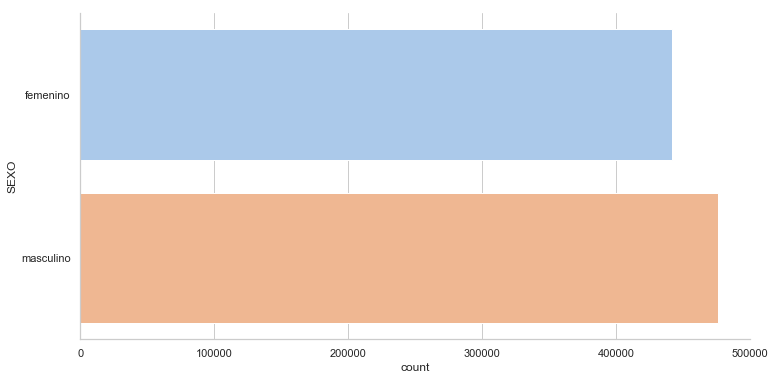

In [109]:
sns.countplot(y=df['SEXO'])
sns.despine()

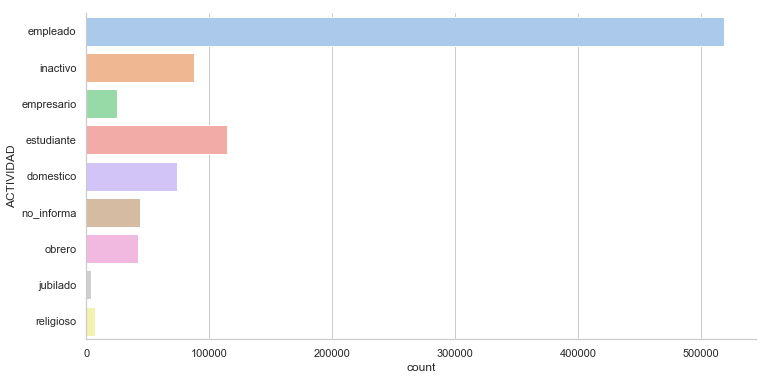

In [110]:
sns.countplot(y=df['ACTIVIDAD'])
sns.despine()

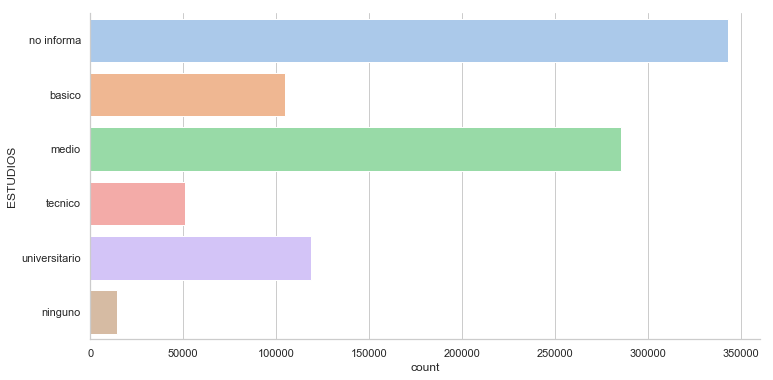

In [111]:
sns.countplot(y=df['ESTUDIOS'])
sns.despine()

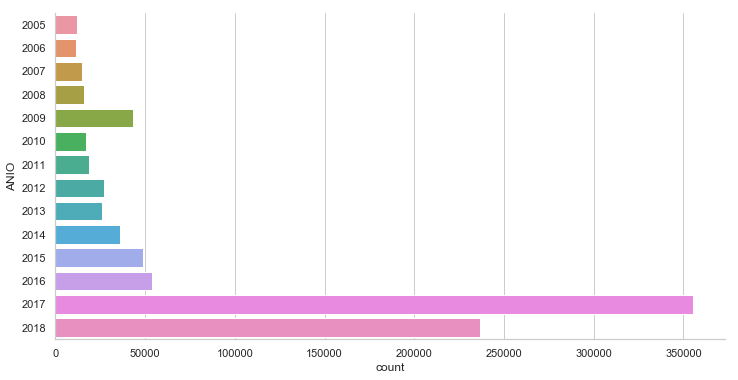

In [112]:
sns.countplot(y=df['ANIO'])
sns.despine()

In [69]:
top_paises = df.PAIS.value_counts()[0:10]
top_paises

peru                       213936
venezuela                  166718
haiti                      129914
colombia                   127008
bolivia                     98400
argentina                   32456
ecuador                     29571
china republica popular     14825
espana                      13861
brasil                      12193
Name: PAIS, dtype: int64

In [70]:
TOP_PAISES_POP = top_paises.sum()
print("Total de Inmigrantes", TOT_INM)
print("Total de Inmigrantes dos Top10: {}, que es {}% del total".format(TOP_PAISES_POP, round((TOP_PAISES_POP/TOT_INM)*100, 0)))

Total de Inmigrantes 917131
Total de Inmigrantes dos Top10: 838882, que es 91.0% del total


In [71]:
top_regiones = df.REGION.value_counts()[0:3]
top_regiones

metropolitana    589106
antofagasta       87270
valparaiso        48072
Name: REGION, dtype: int64

In [72]:
TOP_REG_POP = top_regiones.sum()
print("Total de Inmigrantes dos Top3 regiones: {}, que es {}% del total".format(TOP_REG_POP, round((TOP_REG_POP/TOT_INM)*100, 0)))

Total de Inmigrantes dos Top3 regiones: 724448, que es 79.0% del total


In [73]:
df.EDAD.describe()

count    917131.000000
mean         30.556505
std          12.923269
min           0.000000
25%          24.000000
50%          30.000000
75%          38.000000
max         118.000000
Name: EDAD, dtype: float64

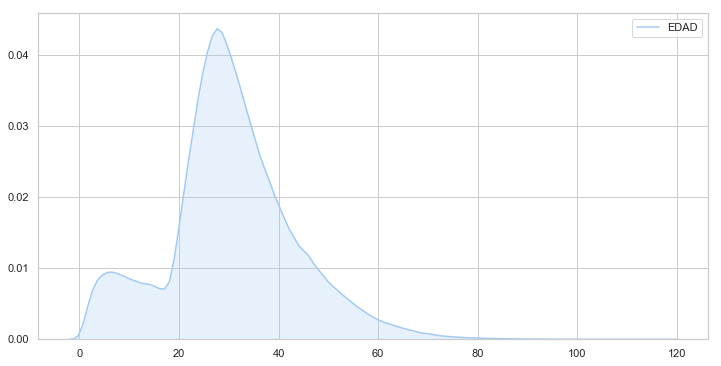

In [113]:
sns.kdeplot(df.EDAD, shade=True)

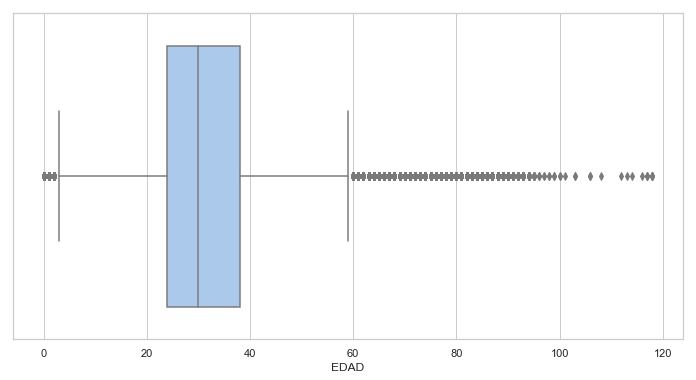

In [114]:
sns.boxplot(df.EDAD)

**Key Insights para los inmigrantes en CHILE**

- En Chile segun los datos que tienen, existen 920.000 extranjeros en Chile, siendo que 52% són hombres y 48% de mujeres.
- La edad media de los inmigramtes es de 30 anõs (cuando sacan el benefício)
- 91% de los extranjeros provienen de 10 paises, y 
- Casi el 80% del total está concentrado en 3 regiones, con mas de la mitad en la Metropolitana . 

### 4. Creación del dataset para la Región Metropolitana

In [76]:
metro = df[df.REGION == 'metropolitana']
metro.shape

(589106, 11)

In [77]:
del metro['REGION'] 

In [78]:
metro.reset_index(drop = True, inplace=True)
metro.head(2)

,PAIS,SEXO,EDAD,ESTUDIOS,ACTIVIDAD,PROFESION,BENEFICIO,TIT_DEP,ANIO,COMUNA
0,peru,femenino,32,no informa,empleado,matrona,definitiva,t,2006,santiago
1,ecuador,masculino,58,no informa,empleado,ingeniero,definitiva,t,2007,providencia


`El dataset "01_extranjeros_rm.xlsx" será generado y dejado disponible para ser trabajado en el notebook: "02_Analisis-Datos.ipynb"`

In [79]:
metro.to_excel('./data/01_extranjeros_rm.xlsx')

---
## Adendum:
### A. Validación de los datos de Extranjería con el Censo 2017 para la RM

`Para validar el dataset creado, haremos un pequeña analisis, correlacionando entre lo número de extranjeros en las comunas de la RM ('metro'), versus los datos obtenídos en último Censo Nacional 2017 ('censo')`

#### Obtener datos del Censo 2017 - Region Metropolitana

In [80]:
!ls ./data/

01_extranjeros_rm.xlsx                PDs_2018_1.xlsx
CENSO_2017_COMUNAS_RM.xlsx            Visas-2017.xlsx
Comunas_RM_Mapas_Vectoriales          Visas-2018_1.xlsx
ML_extranjeros_rm.xlsx                censo_2017_RM.xlsx
PDs-2005-2016.xlsx                    censo_2017_inmigrantes_rm_comuna.xlsx
PDs-2017.xlsx


In [81]:
censo = pd.read_excel('./data/censo_2017_inmigrantes_rm_comuna.xlsx')

In [82]:
censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
COMUNA         52 non-null int64
NOM_COMUNA     52 non-null object
INMIGRANTES    52 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [83]:
censo.INMIGRANTES.sum()

457110

In [84]:
len(metro)

589106

`La diferencia encontrada es lo que se esperaría, pues muchas Visas temporárias fueron sacadas entre 2017 y 2018. Para validar en detalles, hay que mirar los datasets df4 (Visas 2017) y df5 (Visas 2018 con 'mas foco')`

In [85]:
censo.shape

(52, 3)

In [86]:
len(metro.COMUNA.unique())

52

Los dos datasets posuen 52 comunas

In [87]:
censo_test = censo.INMIGRANTES[0:20]

In [88]:
censo_test = censo_test.reset_index()

In [89]:
censo_test = censo_test.INMIGRANTES

In [90]:
censo_test

0     110732
1      30308
2      30023
3      23329
4      22479
5      15628
6      15578
7      15004
8      12030
9      11626
10     10667
11     10173
12      9876
13      9608
14      9330
15      9223
16      7495
17      7411
18      6916
19      6544
Name: INMIGRANTES, dtype: int64

In [91]:
metro_test = metro.COMUNA.value_counts()[0:20]

In [92]:
metro_test = metro_test.reset_index()

In [93]:
metro_test = metro_test.COMUNA

In [94]:
metro_test

0     162325
1      38888
2      37783
3      30937
4      29155
5      21176
6      19523
7      18449
8      15685
9      14020
10     12404
11     11003
12     10426
13     10391
14     10141
15      9442
16      9088
17      8879
18      8296
19      7578
Name: COMUNA, dtype: int64

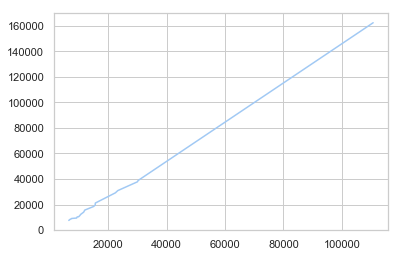

In [95]:
plt.plot(censo_test, metro_test)

In [96]:
censo_test.corr(metro_test)

0.9992184483609619

`Existe una correlación case perfecta entre los dos datasets! Trabajaremos en la análisis de dados con el dataset 'metro' (exportado en la planilla excel).` 

## B. Generar dataset para contextualización de la data analisada en el Notebook 02

In [115]:
!ls ./data

01_extranjeros_rm.xlsx                PDs_2018_1.xlsx
CENSO_2017_COMUNAS_RM.xlsx            Visas-2017.xlsx
Comunas_RM_Mapas_Vectoriales          Visas-2018_1.xlsx
ML_extranjeros_rm.xlsx                censo_2017_RM.xlsx
PDs-2005-2016.xlsx                    censo_2017_inmigrantes_rm_comuna.xlsx
PDs-2017.xlsx


In [98]:
censo = pd.read_excel('./data/censo_2017_inmigrantes_rm_comuna.xlsx')
censo = censo.set_index('COMUNA')
censo.head()

,NOM_COMUNA,INMIGRANTES
COMUNA,,
13101,santiago,110732
13114,las condes,30308
13108,independencia,30023
13127,recoleta,23329
13106,estacion central,22479


In [99]:
censo_2017_RM = pd.read_excel('./data/censo_2017_RM.xlsx')
censo_2017_RM.head()

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,P03B_7,P03C_1,P03C_2,P03C_3,P03C_4,P03C_5,P05_1,P05_2,P05_3,P05_4
121508,13,131,13101,1,1,1,3,1279,13101011001003,421,...,0,186,0,0,0,0,188,0,0,0
121509,13,131,13101,1,1,1,4,1279,13101011001004,185,...,0,113,0,0,0,0,113,0,0,0
121510,13,131,13101,1,1,1,5,1279,13101011001005,776,...,0,419,1,0,0,0,422,0,0,0
121511,13,131,13101,1,1,1,6,1279,13101011001006,416,...,0,224,0,0,0,0,222,0,0,0
121512,13,131,13101,1,1,1,7,1279,13101011001007,376,...,0,191,0,0,0,0,195,0,0,0


In [100]:
data = censo_2017_RM.groupby(by=['COMUNA']).PERSONAS.sum()
data = pd.DataFrame(data)
data.head()

,PERSONAS
COMUNA,
13101,404495
13102,80832
13103,132622
13104,126955
13105,162505


In [101]:
censo = pd.concat([censo, data], axis = 1)
censo.head()

,NOM_COMUNA,INMIGRANTES,PERSONAS
COMUNA,,,
13101,santiago,110732,404495
13102,cerrillos,3620,80832
13103,cerro navia,6022,132622
13104,conchali,9223,126955
13105,el bosque,3368,162505


In [102]:
censo['INM_PERC'] = (censo.INMIGRANTES/censo.PERSONAS)*100 

In [103]:
data = censo_2017_RM.groupby(by=['COMUNA']).TOTAL_VIV.sum()
data = pd.DataFrame(data)
data.head()

,TOTAL_VIV
COMUNA,
13101,193628
13102,24547
13103,38020
13104,37759
13105,47941


In [104]:
censo = pd.concat([censo, data], axis = 1)
censo.head()

,NOM_COMUNA,INMIGRANTES,PERSONAS,INM_PERC,TOTAL_VIV
COMUNA,,,,,
13101,santiago,110732,404495,27.375369,193628
13102,cerrillos,3620,80832,4.478424,24547
13103,cerro navia,6022,132622,4.540725,38020
13104,conchali,9223,126955,7.264779,37759
13105,el bosque,3368,162505,2.072552,47941


In [105]:
censo['PERS_VIV'] = censo.PERSONAS/censo.TOTAL_VIV
censo.head()

,NOM_COMUNA,INMIGRANTES,PERSONAS,INM_PERC,TOTAL_VIV,PERS_VIV
COMUNA,,,,,,
13101,santiago,110732,404495,27.375369,193628,2.089032
13102,cerrillos,3620,80832,4.478424,24547,3.292948
13103,cerro navia,6022,132622,4.540725,38020,3.488217
13104,conchali,9223,126955,7.264779,37759,3.362245
13105,el bosque,3368,162505,2.072552,47941,3.389687


In [106]:
censo.to_excel('./data/CENSO_2017_COMUNAS_RM.xlsx')